In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sssm import SSSM

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

In [2]:
A = {0:np.array([[1,0,0.5],[0,1,0.5],[0,0,1]]), 1:np.array([[1,0,-0.5],[0,1,0.5],[0,0,1]]), 2:np.array([[1,0,0],[0,1,1],[0,0,1]])}
B = {0:np.array([[1,0,0],[0,1,0]]), 1:np.array([[1,0,0],[0,1,0]]), 2:np.array([[1,0,0],[0,1,0]])}
K,S,O = 3, 3, 2
pi_m = {0:np.array([0,0,1]), 1:np.array([0,0,1]), 2:np.array([0,0,1])}
pi_s = {0:np.eye(S)*0.1, 1:np.eye(S)*0.1, 2:np.eye(S)*0.1}
E_h_1, E_h_2, E_h_3 = np.eye(S)*0.1, np.eye(S)*0.1, np.eye(S)*0.1
E_h_1[S-1,S-1], E_h_2[S-1,S-1], E_h_3[S-1,S-1] = 10**-5, 10**-5, 10**-5
E_h = {0:E_h_1, 1:E_h_2, 2:E_h_3}
E_o = {0:np.eye(O)*0.1, 1:np.eye(O)*0.1, 2:np.eye(O)*0.1}

In [3]:
M = np.zeros((K,K))
p0 = np.ones(K)/K
for i in range(K):
    for j in range(K):
        if i == j:
            M[i,j] = 0.9
        else:
            M[i,j] = 0.1/(K-1)

In [4]:
sssm = SSSM(M,p0,A,B,pi_m,pi_s,K,S,O,E_h,E_o)

In [5]:
d_states,c_states,observations = sssm.generate_data(100)

In [6]:
print d_states

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]


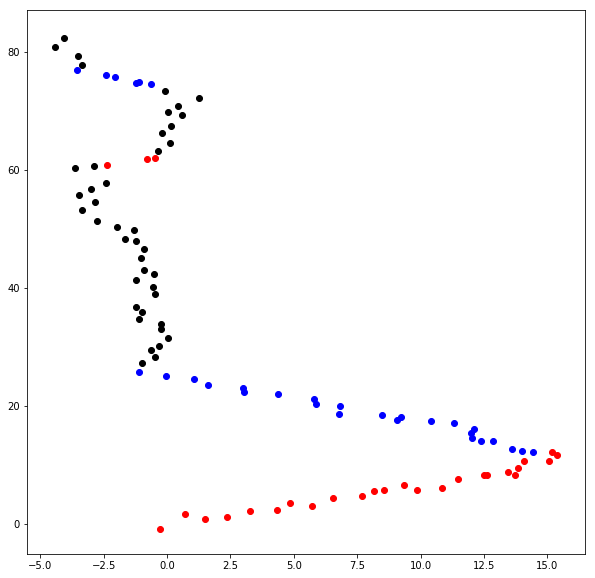

In [7]:
plt.figure(figsize=(10,10))
time = 0
for obs in observations:
    plt.scatter(obs[0], obs[1], color=["red","blue","black"][d_states[time]])
    time += 1

In [8]:
h, H ,gamma = sssm.structured_vi(observations,num_iterations=100)

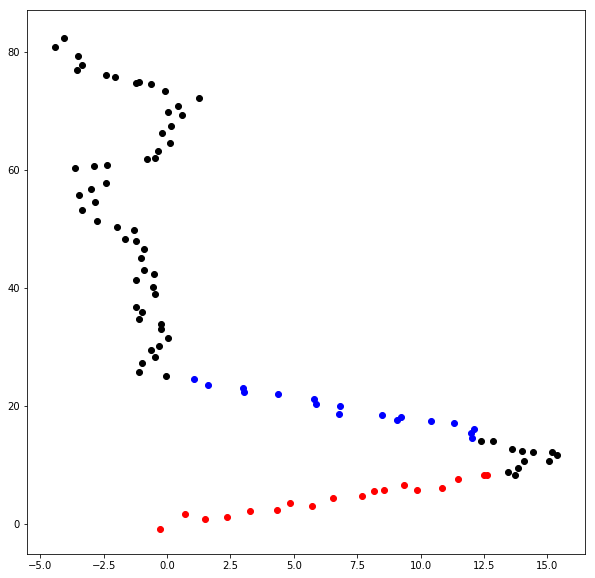

In [9]:
plt.figure(figsize=(10,10))
time = 0
for obs in observations:
    plt.scatter(obs[0], obs[1], color=["red","blue","black"][np.argmax(gamma[:,time])])
    time += 1

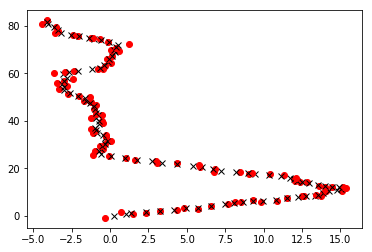

In [10]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(h[i][0],h[i][1],'kx')
plt.show()

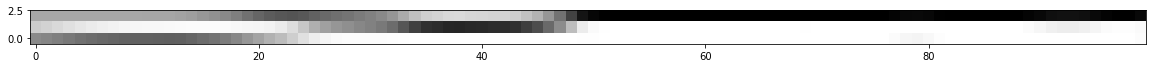

In [11]:
plt.figure(figsize=(20,10))
plt.imshow(gamma, interpolation='nearest', cmap='gray_r')
#plt.axis([0,250,10,0])
plt.gca().invert_yaxis()
plt.show()